In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

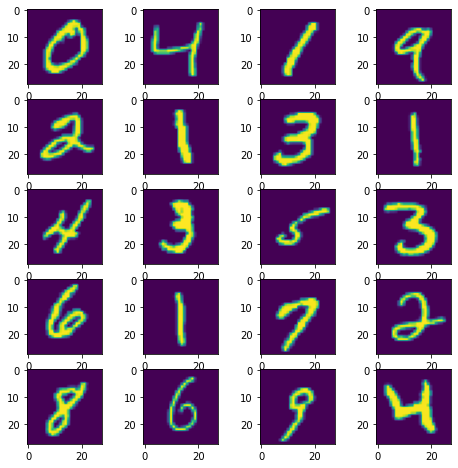

In [3]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [4]:
print("before: "+str(X_train.shape))
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
print("after: "+str(X_train.shape))

before: (60000, 28, 28)
after: (60000, 28, 28, 1)


In [5]:
print("before: "+str(y_train.shape))
# one hot encode target values
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print("after: "+str(y_train.shape))

before: (60000,)
after: (60000, 10)


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2336 - accuracy: 0.9256
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0387 - accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0276 - accuracy: 0.9915
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0205 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0150 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0053 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.007

In [8]:
val_loss,val_accuracy=model.evaluate(X_test,y_test)
print(val_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9913
0.9912999868392944
